# Lets try a simple ray tracing

As we have seen, the entire simulation chain involves complex interactions in the atmosphere. In this part, we will only do a simple ray tracing for a bunch of photons falling on a telescope and reflecting onto the camera plane.

An advanced SiPM based camera developed at TIFR is now under commissioning at the GOALS observatory Mt. Abu. It is mounted on one of the TACTIC telescopes, which are 4m class (diameter) IACTs.
There are 34 tesselated mirrors of 60cm diameter. 

Calculate the 90% containment of the psf (D90) of the spot size if the focal length of each mirror is 4m and spot size ~ 4 mm

In [11]:
# Bunch of regular imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

Define the parameters

In [15]:
# Parameters
n_photons = 
sigma_spot =  
focal_length =  
mirror_diameter =  
n_mirrors = 

Get the coordinates of the mirrors if they are in a perfectly hexagonal grid.
In reality, the centers of mirrors may not be ideal, and you would put in an input file
for the mirror positions

In [77]:
mirror_positions = []
mirror_positions.append((0,0))  # central mirror
angles_ring1 = np.linspace(0, 2*np.pi, 6, endpoint=False)
for a in angles_ring1:
    mirror_positions.append((mirror_diameter*np.cos(a), mirror_diameter*np.sin(a)))
angles_ring2 = np.linspace(0, 2*np.pi, 12, endpoint=False)
for a in angles_ring2:
    mirror_positions.append((2*mirror_diameter*np.cos(a), 2*mirror_diameter*np.sin(a)))
angles_ring3 = np.linspace(0, 2*np.pi, 15, endpoint=False)
for a in angles_ring3:
    mirror_positions.append((3*mirror_diameter*np.cos(a), 3*mirror_diameter*np.sin(a)))

In [78]:
len(mirror_positions)

34

In [84]:
mirror_diameter

600.0

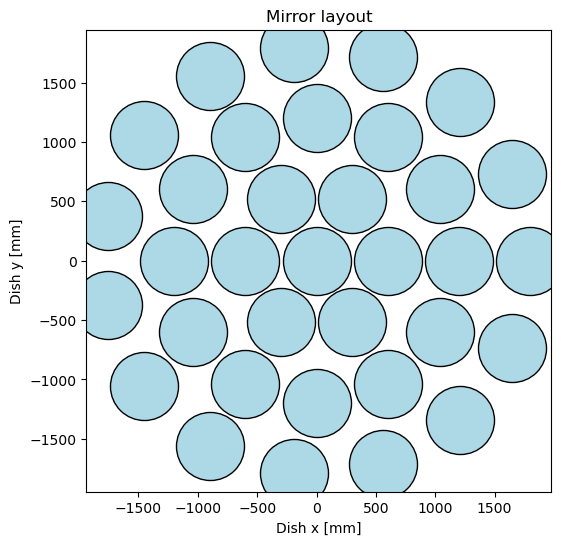

In [88]:
# Plot the mirror layout
plt.figure(figsize=(6,6))
for (mx, my) in mirror_positions:
    plt.scatter(mx, my, s=mirror_diameter*4, facecolors='lightblue', edgecolors='black')
plt.xlabel("Dish x [mm]")
plt.ylabel("Dish y [mm]")
plt.title("Mirror layout")
plt.axis('equal')
plt.show()


We also need to know the number of photons hitting each mirror
In reality, you will need to consider the shadows falling on each mirror. So it will be list. Many photons will also be lost in the dead spaces.
Again, for now, take a uniform number

In [ ]:
n_photons_per_mirror = 

Generate hits on each mirror. 

In [ ]:
x_camera, y_camera = [], []

for (mx, my) in mirror_positions:
    # Generate photons uniformly across mirror surface
    r = 
    theta = 
    x_mirror = 
    y_mirror = 

    # Ideal reflection to focal plane (all to (0,0))
    x_cam = np.zeros_like(x_mirror)
    y_cam = np.zeros_like(y_mirror)

    # Add Gaussian blur for spot size
    x_cam += 
    y_cam += 

    x_camera.extend(x_cam)
    y_camera.extend(y_cam)

x_camera = np.array(x_camera)
y_camera = np.array(y_camera)

In [ ]:
# Compute radial distances
r_camera =

In [ ]:
# D90 calculation
r90 = 
D90 =
print(f"90% containment diameter (D90): {D90:.2f} mm")

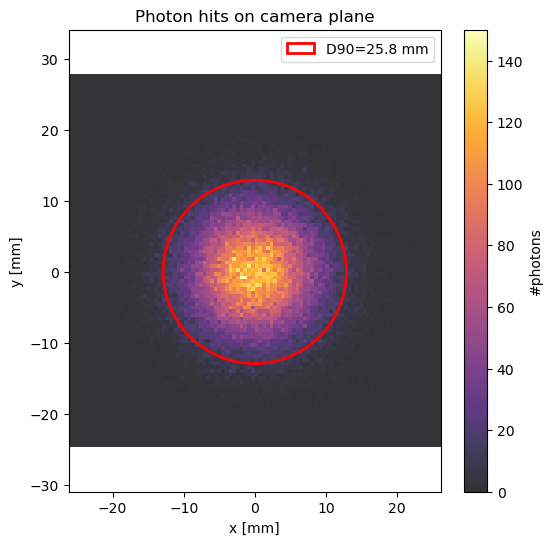

In [57]:
# Plot photons on camera plane
plt.figure(figsize=(6,6))
plt.hist2d(x_camera, y_camera, bins=100,  cmap='inferno', alpha=0.8)
plt.colorbar(label="#photons")
circle = plt.Circle((0,0), r90, color='red', fill=False, lw=2, label=f'D90={D90:.1f} mm')
plt.gca().add_patch(circle)
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.title("Photon hits on camera plane")
plt.legend()
plt.axis('equal')
plt.show()

# Effect of mirror reflectivity 

1. We never have 100% reflection. How many photons hit your camera plane assuming ~ 80% mirror reflectivity?
2. How much dead space do you expect between the mirrors? Add that info to your simultaion.

Unfortunately, we seeing a spot size of ~ 30mm.
What do you think is the reason?

We have assumed perfectly aligned mirrors, which is not real. 
How much misalignemnt is necessary to reproduce the observed spot size?

- Assign each mirror a random angular misalignment (small tilt).
- Convert this tilt into a shift on the focal plane
- Add this systematic offset to all photons from that mirror, in addition to the Gaussian blur.

In [ ]:
mis_fac = 
tilt_x = 
tilt_y = 
offset_x = 
offset_y = 
x_cam +=  
y_cam += 

So far, we have considered the mirrors as flat patches arranged in rings.
But, in reality, we want a parabolic dish on which the mirrors are placed. 
To implement that, you need to

- construct a parabolic surface

- consider incoming photons are parallel to the optical axis (z-axis).

- At each mirror, compute the local normal vector.

- Reflect the photon direction using the law of reflection.

- Propagate the reflected ray to the focal plane.